## Travaller avec histograms

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from __future__ import print_function, division 

plt.style.use('seaborn-poster')

We are going to generate a random sample of data using ```numpy.random.gauss```

In [19]:
data1 = np.random.normal(loc=5,scale=1, size=1000) # 1st gaussian
data2 = np.random.normal(loc=10,scale=2, size=3000) # 2nd gaussian
data = np.concatenate((data1,data2))

ntotal = data.size
print (data[:5])

[5.54593987 2.64251874 6.39501311 5.56705275 6.58845634]


Now we are going to make the representation of the data in a histogram

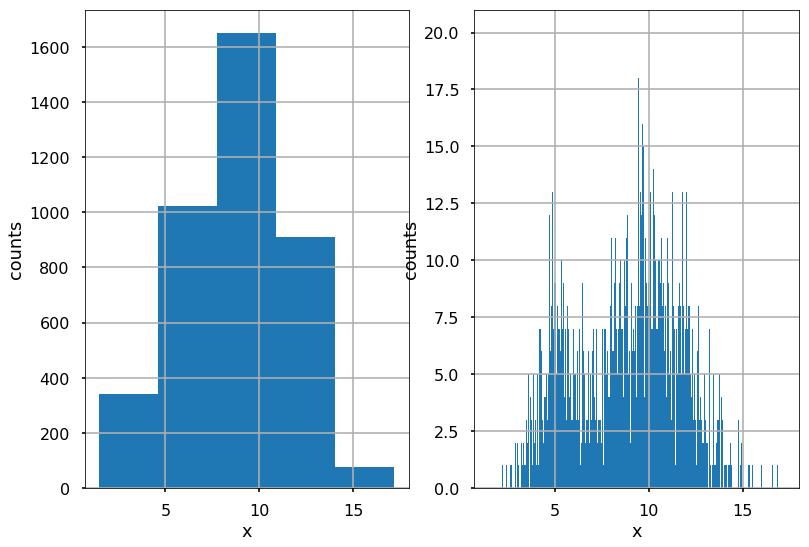

In [20]:
fig, axes = plt.subplots(1,2)
axes[0].grid()
axes[0].hist(data, bins = 5)
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

axes[1].hist(data, bins = 1000)
axes[1].grid()
axes[1].set_xlabel("x")
axes[1].set_ylabel("counts")

plt.show()

Which one of the 2 binning is correct?

### Error of a bin

Each bin of a histogram has associated an error. This error can be derived from the binomial distribution. Indeed, we can see the process of an event falling into a bin (or not) as a binomial event. The probability of having $k$ success, or k events falling in a bin should therefore follow the binomial distribution:

$$P(k; n, p) = {n \choose k} p^k(1-p)^{n-k}$$

where $n$ are the total number of events in the sample and $p$ is the probability to fall into a given bin. This probability is unknown, but I could estimate from the histogram itself. For a given bin $i$, if I have $n_i$ events inside a bin $i$ then I can approximate the probability of falling into that bin as the ratio of events inside this bin, and the total number of events:

$$p\simeq \frac{n_i}{n}$$

In this case the mean of the binomial distribution for that particular bin $i$ can be written as:

$$\mu_i = n\cdot p \equiv n_i$$ 
In other words, the mean of the binomial distribution of each bin, is the bin content $n_i$. I can do the same for the variance:

$$\sigma_i = \sqrt{np(1-p)} = \sqrt{n\frac{n_i}{n}(1 -\frac{ni}{n})} = \sqrt{n_i} $$

Et voilá, I arrived at the conclusion that distribution of events inside a bin, should follow a binomial distribution with mean equal to the number of events inside a bin, and a dispersion of squared root of that number!

With this knowledge is now clear that from the plots above the one with 5 bins the fine structure of the data distribution is lost (too small relative errors), while with 1000 bins, heights of individual bins change more than the size of the bin errors (sampling error).



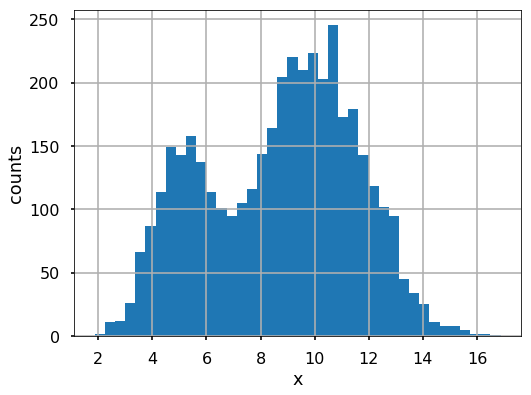

In [7]:

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.hist(data, bins = 40)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.grid()
plt.show()



I can in principle also use different binning for different regions of a histrogram.

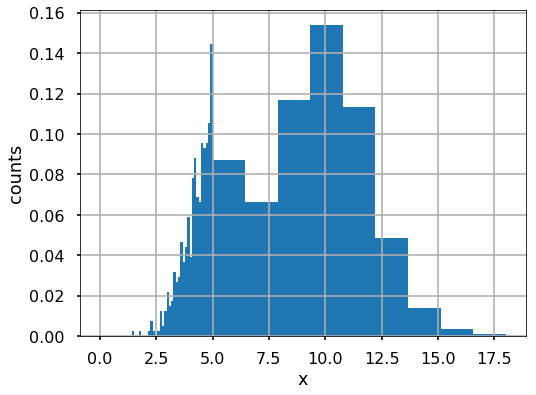

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=True),
                                     np.linspace(5,18, 10))), 
        normed=True)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()

The method matplotlib.hist returns as well the bin_edges, the heights of the bins and an array of objects called patches, which represent the color, geometry, etc. of the bin representation.


### Working without plotting

So far we used ``matplotlib.hist`` to create the historgrams. Sometimes you only need to access the information of the histograms without plotting them. In that case we can use ``numpy.histogram`` method which returns the same information as ``matplotlib.hist`` but without the patches:


In [11]:
hist, bin_edges = np.histogram(data, bins= 40)

print (hist)
print (bin_edges)

[  2  11  12  26  66  87 114 149 143 158 137 114 101  95 105 116 144 164
 204 220 210 223 203 245 173 179 143 118 102  95  45  34  25  11   8   8
   5   2   2   1]
[ 1.86671282  2.24182983  2.61694685  2.99206386  3.36718087  3.74229789
  4.1174149   4.49253192  4.86764893  5.24276595  5.61788296  5.99299998
  6.36811699  6.74323401  7.11835102  7.49346804  7.86858505  8.24370207
  8.61881908  8.9939361   9.36905311  9.74417013 10.11928714 10.49440416
 10.86952117 11.24463819 11.6197552  11.99487222 12.36998923 12.74510625
 13.12022326 13.49534028 13.87045729 14.24557431 14.62069132 14.99580834
 15.37092535 15.74604237 16.12115938 16.4962764  16.87139341]


In [12]:
print (hist.size)
print (bin_edges.size)

40
41


Note that the bin_edges have an element more than the bin heights since it gives the overflow bin_edge. Also note that numpy returns the bin_edges and not the bin centers nor the bin widths. I can calulate those easily:


In [13]:
binwidths = np.diff(bin_edges)

print (binwidths)
print (binwidths.size)

[0.37511701 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701
 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701
 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701
 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701
 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701
 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701 0.37511701
 0.37511701 0.37511701 0.37511701 0.37511701]
40


In [14]:
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2.
print (bin_centers)
print (bin_centers.size)

[ 2.05427132  2.42938834  2.80450535  3.17962237  3.55473938  3.9298564
  4.30497341  4.68009043  5.05520744  5.43032446  5.80544147  6.18055849
  6.5556755   6.93079252  7.30590953  7.68102655  8.05614356  8.43126058
  8.80637759  9.18149461  9.55661162  9.93172864 10.30684565 10.68196267
 11.05707968 11.43219669 11.80731371 12.18243072 12.55754774 12.93266475
 13.30778177 13.68289878 14.0580158  14.43313281 14.80824983 15.18336684
 15.55848386 15.93360087 16.30871789 16.6838349 ]
40


### Normalization of histograms

As default histograms are representation of occourence ie, in their y-axis they show $n_i$ which is just the number of events inside that bin. However, histograms can also be used to represent a density distribution. In this case histograms need to be normalized. Normalizing a histogram means divinding each bin by the total number and the binwidth, ie:

$$ n_i \rightarrow \frac{n_i}{\Delta x n} $$

since

$$\lim_{n\rightarrow \infty, \Delta x \rightarrow 0} \frac{n_i}{n \Delta x} \equiv f(x)$$

and therefore the normalization  goes as:

$$\int_{-\infty}^{\infty} f(x) {\rm d} x = 1 \rightarrow \sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1$$

The ```numpy.histogram``` method can already do the normalized histogram. It is called ```density``` and it divides each bin by the total number and the bin_width:

In [15]:
hist, bin_edges = np.histogram(data, bins= 40, density = True)

print (np.sum(hist))


2.6658348204240756


Note that the sum is not 1. You need to multiply by the bin width to make:

$$\sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1 $$

In [16]:
bin_width = np.diff(bin_edges)[0]

print (np.sum(hist)*bin_width)

1.0000000000000002


Now I have all these series of heights and edges, how can I plot this without going back to ```plt.hist```?

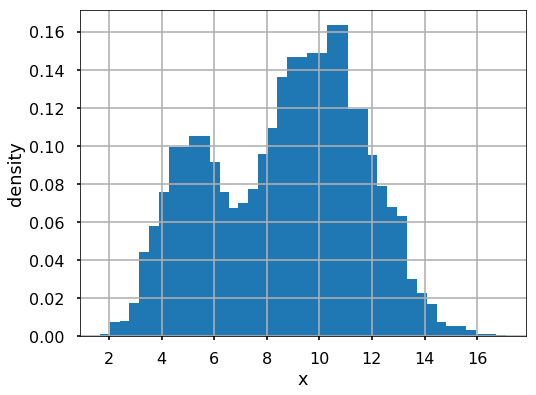

In [17]:

bin_centers = bin_edges[:-1] + bin_width/2.


fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.bar(bin_centers, hist)
ax.set_xlabel("x")
ax.set_ylabel("density")